In [ ]:
!nvidia-smi

Sun Feb  5 11:09:13 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P0    16W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip uninstall gdown -y && pip install gdown
!gdown -V
!gdown --folder https://drive.google.com/drive/folders/1uJuupX93EWaQ4xlGuDK7PGf-4k2uDUeF?usp=sharing

In [ ]:
# !pip3 install matplotlib==3.1.3

In [ ]:
!pip3 install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/



*   IMPORTING LIBRARIES
*   IMPORTING DATA
*   PREPROCESSING DATA
  - STOP WORDS
  - LOWER CASING
  - PUNCTUATIONS
*   EDA
  - LABELS AND LENGTH
  - WORD CLOUD
  - POLARITY GRAPH
*   TRAINING
  - THINKING AND APPROACH
  - CODE SNIPPETS
*   EVALUATION
  - METRICS
  - CHARTS AND PLOTS





  IMPORTING LIBRARIES

In [ ]:
# Importing Libraries.
import numpy as np
import nltk
import pandas as pd
import seaborn as sns
import  matplotlib.pyplot as plt
from google.colab import drive
import tensorflow as tf
import random
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
import IPython
random.seed(1366)

IMPORTING DATA

In [ ]:
#Importing google colab for attaching it to drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_evaluation = pd.read_excel("/content/drive/MyDrive/ML-Assignment-Data/evaluation.xlsx")
data_train = pd.read_excel("/content/drive/MyDrive/ML-Assignment-Data/train.xlsx")

In [ ]:
data_evaluation

,text,reason,label
0,the app is crashing when i play a vedio,app crashes during playback,1.0
1,but i want to connect it to the tv from one de...,want compatibility with more smart televisions,0.0
2,very helpful when and home working remotley,good app for work,0.0
3,this zoom so called and missed call and mobile...,receiving incorrect phone number message,0.0
4,one of my favorite apps,good for spending time,0.0
...,...,...,...
8995,very good streaming platform has a lot of content,app has very good content,1.0
8996,so paying for an app that is not fit for purpose.,unable to use app,0.0
8997,"it does not work well for me, it loads, but if...",app keeps loading indefinitely,0.0
8998,i can not watch the new disney shows.,unable to load the episodes list,0.0


In [ ]:
data_train

,text,reason,label
0,this is an amazing app for online classes!but,good app for conducting online classes,1.0
1,very practical and easy to use,app is user-friendly,1.0
2,this app is very good for video conferencing.,good for video conferencing,1.0
3,i can not download this zoom app,unable to download zoom app,1.0
4,i am not able to download this app,want to download the app,1.0
...,...,...,...
2056,i am not getting jio tv properly.,unable to use with jio tv,1.0
2057,(learn from the netflix interface),netflix ui is better,1.0
2058,"hello,\ndisney+ must also be installed on chro...",unable to use disney on chromecast,1.0
2059,it is a shame that disney+ does not work on tv...,unable to use disney plus on tv,1.0


## Pre Processing

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
# #defining the function to remove punctuation
# def remove_punctuation(text):
#     punctuationfree="".join([i for i in text if i not in string.punctuation])
#     return punctuationfree

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
#defining the function to preprocess textual data
def processingText(x):
  lemmatizer = WordNetLemmatizer()
  x = re.sub('[^a-zA-Z]', ' ', x )
  x = x.lower()
  x = x.split()
  # ps=PorterStemmer()
  # x = [ps.stem(word) for word in x if not word in set(stopwords.words('english'))]
  # x = [lemmatizer.lemmatize(word) for word in x if not word in set(stopwords.words('english'))]
  x = [lemmatizer.lemmatize(word) for word in x]
  x = ' '.join(x)
  return x

In [ ]:
data_train

,text,reason,label
0,this is an amazing app for online classes!but,good app for conducting online classes,1.0
1,very practical and easy to use,app is user-friendly,1.0
2,this app is very good for video conferencing.,good for video conferencing,1.0
3,i can not download this zoom app,unable to download zoom app,1.0
4,i am not able to download this app,want to download the app,1.0
...,...,...,...
2056,i am not getting jio tv properly.,unable to use with jio tv,1.0
2057,(learn from the netflix interface),netflix ui is better,1.0
2058,"hello,\ndisney+ must also be installed on chro...",unable to use disney on chromecast,1.0
2059,it is a shame that disney+ does not work on tv...,unable to use disney plus on tv,1.0


In [ ]:
data_evaluation

,text,reason,label
0,the app is crashing when i play a vedio,app crashes during playback,1.0
1,but i want to connect it to the tv from one de...,want compatibility with more smart televisions,0.0
2,very helpful when and home working remotley,good app for work,0.0
3,this zoom so called and missed call and mobile...,receiving incorrect phone number message,0.0
4,one of my favorite apps,good for spending time,0.0
...,...,...,...
8995,very good streaming platform has a lot of content,app has very good content,1.0
8996,so paying for an app that is not fit for purpose.,unable to use app,0.0
8997,"it does not work well for me, it loads, but if...",app keeps loading indefinitely,0.0
8998,i can not watch the new disney shows.,unable to load the episodes list,0.0


In [ ]:
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# for col in data_train.columns:
data_train['text'] = data_train['text'].apply(lambda x : processingText(x))
data_train['reason'] = data_train['reason'].apply(lambda x : processingText(x))
data_train['label'] = data_train['label'].astype(int)

In [ ]:
# for col in data_train.columns:
data_evaluation['text'] = data_evaluation['text'].apply(lambda x : processingText(x))
data_evaluation['reason'] = data_evaluation['reason'].apply(lambda x : processingText(x))
data_evaluation['label'] = data_evaluation['label'].astype(int)

In [ ]:
data_train

,text,reason,label
0,this is an amazing app for online class but,good app for conducting online class,1
1,very practical and easy to use,app is user friendly,1
2,this app is very good for video conferencing,good for video conferencing,1
3,i can not download this zoom app,unable to download zoom app,1
4,i am not able to download this app,want to download the app,1
...,...,...,...
2056,i am not getting jio tv properly,unable to use with jio tv,1
2057,learn from the netflix interface,netflix ui is better,1
2058,hello disney must also be installed on chromecast,unable to use disney on chromecast,1
2059,it is a shame that disney doe not work on tv b...,unable to use disney plus on tv,1


In [ ]:
data_evaluation

,text,reason,label
0,the app is crashing when i play a vedio,app crash during playback,1
1,but i want to connect it to the tv from one de...,want compatibility with more smart television,0
2,very helpful when and home working remotley,good app for work,0
3,this zoom so called and missed call and mobile...,receiving incorrect phone number message,0
4,one of my favorite apps,good for spending time,0
...,...,...,...
8995,very good streaming platform ha a lot of content,app ha very good content,1
8996,so paying for an app that is not fit for purpose,unable to use app,0
8997,it doe not work well for me it load but if i t...,app keep loading indefinitely,0
8998,i can not watch the new disney show,unable to load the episode list,0


# EDA
*   EDA
  - LABELS AND LENGTH
  - WORD CLOUD
  - POLARITY GRAPH

ANALYSIS ON TEXT/REASON LENGTH AND LABELS

In [ ]:
data_train_temp = pd.DataFrame(columns=['text_length', 'reason_length', "label"])
data_evaluation_temp = pd.DataFrame(columns=['text_length', 'reason_length', "label"])
data_train_temp['text_length'] = data_train['text'].apply(lambda x : len(x))
data_train_temp['reason_length'] = data_train['reason'].apply(lambda x : len(x))
data_train_temp['label'] = data_train['label']
data_evaluation_temp['text_length'] = data_evaluation['text'].apply(lambda x : len(x))
data_evaluation_temp['reason_length'] = data_evaluation['reason'].apply(lambda x : len(x))
data_evaluation_temp['label'] = data_evaluation['label']
data_length_train = data_train_temp['text_length'] + data_train_temp['reason_length']
data_length_evaluation = data_evaluation_temp['text_length'] + data_evaluation_temp['reason_length']

Text(0.5, 1.0, 'TRAINING DATA LENGTH (Text + Reason)')

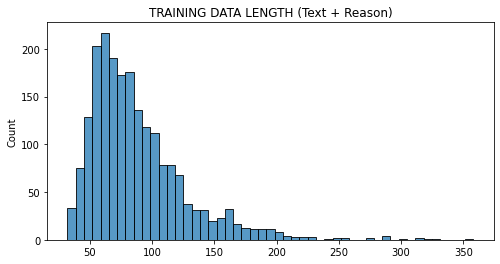

In [ ]:
plt.figure(figsize = (8, 4), facecolor = None)
sns.histplot(data = data_length_train, )
plt.title("TRAINING DATA LENGTH (Text + Reason)")

Text(0.5, 1.0, 'EVALUATION DATA LENGTH (Text + Reason)')

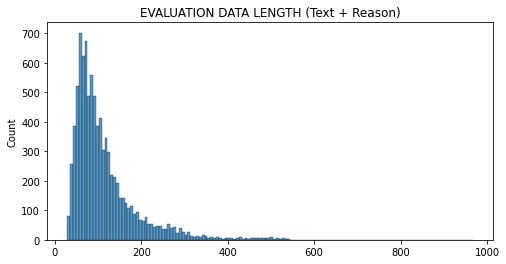

In [ ]:
plt.figure(figsize = (8, 4), facecolor = None)
sns.histplot(data = data_length_evaluation, )
plt.title("EVALUATION DATA LENGTH (Text + Reason)")

Text(0.5, 1.0, 'Training data text length')

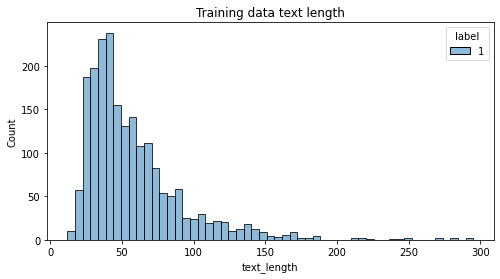

In [ ]:
plt.figure(figsize = (8, 4), facecolor = None)
sns.histplot(data = data_train_temp, x='text_length' , hue='label')
plt.title("Training data text length")

Text(0.5, 1.0, 'Training data reason length')

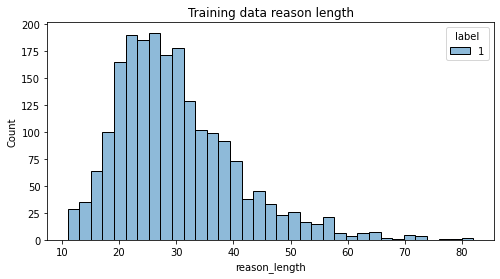

In [ ]:
plt.figure(figsize = (8, 4), facecolor = None)
sns.histplot(data = data_train_temp, x='reason_length' , hue='label')
plt.title("Training data reason length")

Text(0.5, 1.0, 'Evaluation data text length & labels')

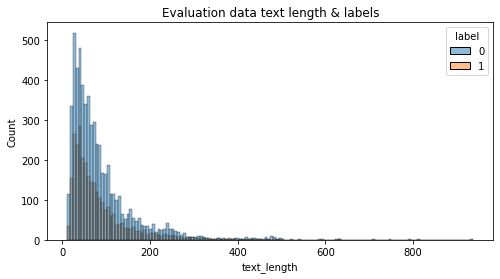

In [ ]:
plt.figure(figsize = (8, 4), facecolor = None)
sns.histplot(data = data_evaluation_temp, x='text_length' , hue='label')
plt.title("Evaluation data text length & labels")

Text(0.5, 1.0, 'Evaluation data text length & labels')

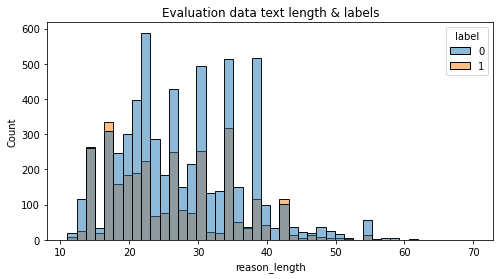

In [ ]:
plt.figure(figsize = (8, 4), facecolor = None)
sns.histplot(data = data_evaluation_temp, x='reason_length' , hue='label')
plt.title("Evaluation data text length & labels")

PUNIT : INSIGHTS

## WORDCLOUD

In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
comment_words = ''
for val in data_train.text:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens)+" "
wordcloud1 = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

In [ ]:
stopwords = set(STOPWORDS)
comment_words = ''
for val in data_train.reason:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens)+" "
wordcloud2 = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

In [ ]:
stopwords = set(STOPWORDS)
comment_words = ''
for val in data_evaluation.text:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens)+" "
wordcloud3 = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
comment_words = ''
for val in data_evaluation.reason:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens)+" "
wordcloud4 = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

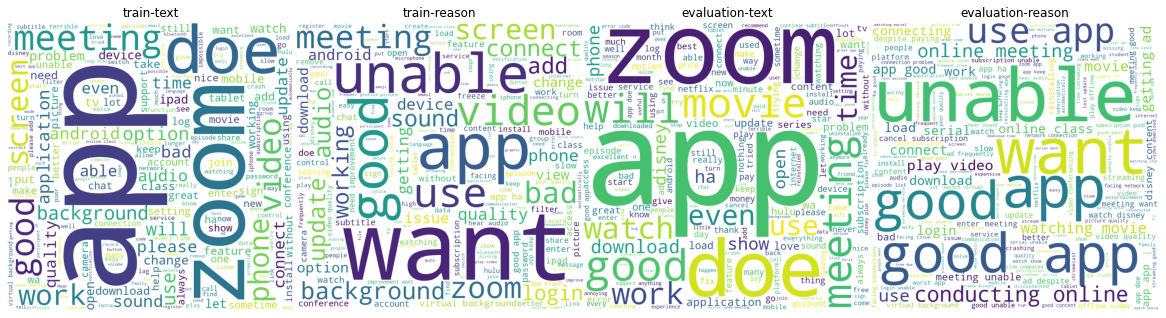

In [ ]:
plt.figure(figsize = (16, 64), facecolor = None)
plt.subplot(1, 4, 1)
plt.title("train-text")
plt.imshow(wordcloud1)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.subplot(1, 4, 2)
plt.title("train-reason")
plt.imshow(wordcloud2)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.subplot(1, 4, 3)
plt.title("evaluation-text")
plt.imshow(wordcloud3)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.subplot(1, 4, 4)
plt.title("evaluation-reason")
plt.imshow(wordcloud4)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

PUNIT : INSIGHTS

##POLARITY

In [ ]:
from textblob import TextBlob
df_n_eval = data_evaluation.copy()
df_n_train = data_train.copy()
df_n_eval['polarity']  = data_evaluation.text.apply(lambda x:TextBlob(x).sentiment.polarity)
df_n_train['polarity'] = data_train.text.apply(lambda x:TextBlob(x).sentiment.polarity)

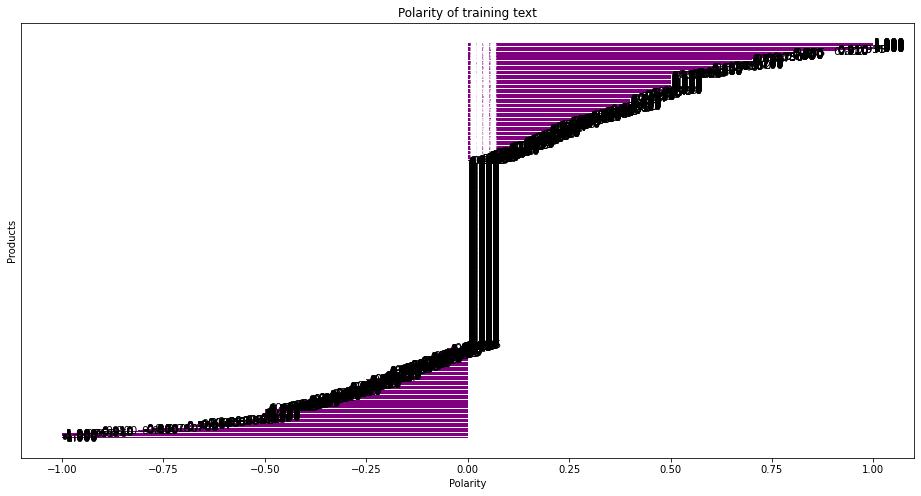

In [ ]:
product_polarity_sorted=pd.DataFrame(df_n_train['polarity'].sort_values(ascending=True))
plt.figure(figsize=(16,8))
plt.xlabel('Polarity')
plt.ylabel('Products')
plt.title('Polarity of training text')
polarity_graph=plt.barh(np.arange(len(product_polarity_sorted.index)),product_polarity_sorted['polarity'],color='purple',)
for bar,product in zip(polarity_graph,product_polarity_sorted.index):
  plt.text(0.005,bar.get_y()+bar.get_width(),'{}'.format(product),va='center',fontsize=11,color='white')
for bar,polarity in zip(polarity_graph,product_polarity_sorted['polarity']):
  plt.text(bar.get_width()+0.001,bar.get_y()+bar.get_width(),'%.3f'%polarity,va='center',fontsize=11,color='black')
plt.yticks([])
plt.show()

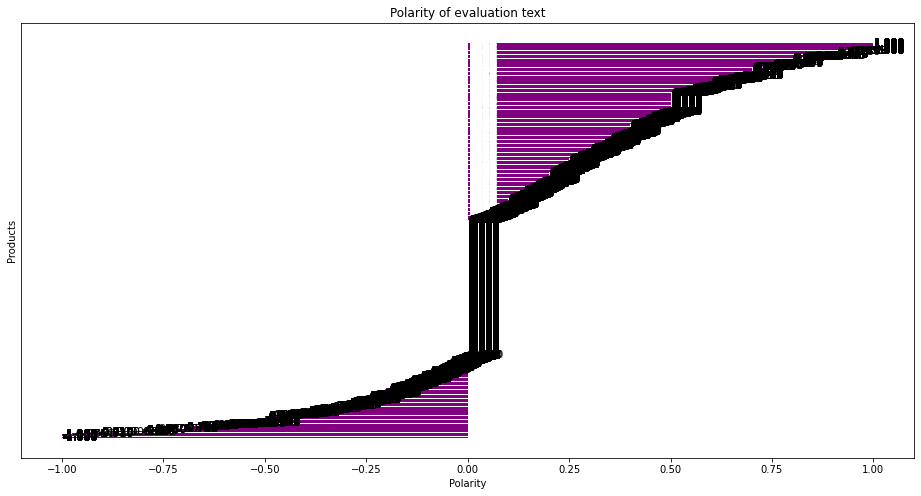

In [ ]:
product_polarity_sorted=pd.DataFrame(df_n_eval['polarity'].sort_values(ascending=True))
plt.figure(figsize=(16,8))
plt.xlabel('Polarity')
plt.ylabel('Products')
plt.title('Polarity of evaluation text')
polarity_graph=plt.barh(np.arange(len(product_polarity_sorted.index)),product_polarity_sorted['polarity'],color='purple',)
for bar,product in zip(polarity_graph,product_polarity_sorted.index):
  plt.text(0.005,bar.get_y()+bar.get_width(),'{}'.format(product),va='center',fontsize=11,color='white')
for bar,polarity in zip(polarity_graph,product_polarity_sorted['polarity']):
  plt.text(bar.get_width()+0.001,bar.get_y()+bar.get_width(),'%.3f'%polarity,va='center',fontsize=11,color='black')
plt.yticks([])
plt.show()

On checking polarity, It was observed that training data as well as evaluation data both consist of positive as well as negative sentimental data.

# Training




####APPROACH 1

It could be seen that there were no zero-labeled data samples available in the training data therefore, I shuffled the reasons in the existing training data and labeled all of them as 0. After doing this, I concatenated the original data and data achieved after shuffling which ultimately gave us a balanced data of around 4k sample with equal distribution of labels.

SHUFFLING REASONS AND HARD LABELING EACH PAIR AS 0

In [ ]:
!pip install sentencepiece
!pip install evaluate
!pip install sentence_transformers
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
data_train_ = data_train.copy()
data_train_["reason"]  = data_train_["reason"].sample(frac=1).reset_index(drop=True)
data_train_['label'] = 0

In [ ]:
df = pd.concat([data_train_, data_train])

In [ ]:
df['label'].value_counts()

0    2061
1    2061
Name: label, dtype: int64

In [ ]:
df = df.sample(frac = 1)

In [ ]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')

print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
df_train, df_dev = train_test_split( df, test_size=0.2, random_state=42, shuffle=True, stratify=df['label'])

In [ ]:
from transformers import AutoTokenizer

In [ ]:
df.isna().sum()

text      0
reason    0
label     0
dtype: int64

PUNIT : WRITE ABOUT BERT-BASE-CASED

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--bert-base-cased/snapshots/5532cc56f74641d4bb33641f5c76a55d11f846e0/config.json
Model config BertConfig {
  "_name_or_path": "bert-base-cased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.26.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 28996
}

loading file vocab.txt from cache at /root/.cache/huggingface/hub/models--bert-base-cased/snapshots/5532cc56f74641d4bb33641f5c76a55d11f846e0/vocab.txt
loading file tokenize

In [ ]:
def tokenize_function(examples):
    return tokenizer(examples["text"], examples["reason"], padding="max_length", truncation=True, max_length = 128)

In [ ]:
from datasets import Dataset

In [ ]:
train_ds = Dataset.from_pandas(df_train)
dev_ds = Dataset.from_pandas(df_dev)

In [ ]:
tokenized_train = train_ds.map(tokenize_function, batched=True)
tokenized_dev = dev_ds.map(tokenize_function, batched=True)

tokenized_dev = tokenized_dev.remove_columns(['text', 'reason',  '__index_level_0__'])
tokenized_dev = tokenized_dev.with_format("torch")

tokenized_train = tokenized_train.remove_columns(['text', 'reason','__index_level_0__'])
tokenized_train = tokenized_train.with_format("torch")

  0%|          | 0/4 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In [ ]:
from transformers import AutoModelForSequenceClassification
model = AutoModelForSequenceClassification.from_pretrained("bert-base-cased")

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--bert-base-cased/snapshots/5532cc56f74641d4bb33641f5c76a55d11f846e0/config.json
Model config BertConfig {
  "_name_or_path": "bert-base-cased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.26.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 28996
}

loading weights file pytorch_model.bin from cache at /root/.cache/huggingface/hub/models--bert-base-cased/snapshots/5532cc56f74641d4bb33641f5c76a55d11f846e0/pytorch_model.b

In [ ]:
from transformers import TrainingArguments
training_args = TrainingArguments(output_dir="test_trainer")

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [ ]:
import numpy as np
import evaluate
metric = evaluate.load("f1")

In [ ]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

In [ ]:
from transformers import TrainingArguments, Trainer
training_args = TrainingArguments(output_dir="test_trainer", evaluation_strategy="epoch", per_device_train_batch_size = 96, per_device_eval_batch_size = 96, num_train_epochs = 5 )

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_dev,
    compute_metrics=compute_metrics,
)

In [ ]:
trainer.train()

/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 3297
  Num Epochs = 5
  Instantaneous batch size per device = 96
  Total train batch size (w. parallel, distributed & accumulation) = 96
  Gradient Accumulation steps = 1
  Total optimization steps = 175
  Number of trainable parameters = 108311810


Epoch,Training Loss,Validation Loss,F1
1,No log,0.158475,0.954327
2,No log,0.140192,0.953181
3,No log,0.133676,0.962424
4,No log,0.143176,0.960384
5,No log,0.141406,0.963680


***** Running Evaluation *****
  Num examples = 825
  Batch size = 96
***** Running Evaluation *****
  Num examples = 825
  Batch size = 96
***** Running Evaluation *****
  Num examples = 825
  Batch size = 96
***** Running Evaluation *****
  Num examples = 825
  Batch size = 96
***** Running Evaluation *****
  Num examples = 825
  Batch size = 96


Training completed. Do not forget to share your model on huggingface.co/models =)




TrainOutput(global_step=175, training_loss=0.12949011666434151, metrics={'train_runtime': 340.6161, 'train_samples_per_second': 48.398, 'train_steps_per_second': 0.514, 'total_flos': 1084346436902400.0, 'train_loss': 0.12949011666434151, 'epoch': 5.0})

In [ ]:
evaluation_ds = Dataset.from_pandas(data_evaluation)
tokenized_evaluation = evaluation_ds.map(tokenize_function, batched=True)
tokenized_evaluation = tokenized_evaluation.remove_columns(['text', 'reason', 'label'])
tokenized_evaluation = tokenized_evaluation.with_format("torch")
predictions = trainer.predict(tokenized_evaluation)
predictions = np.argmax(predictions.predictions, axis=1)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(data_evaluation['label'], predictions))

              precision    recall  f1-score   support

           0       0.88      0.52      0.65      5999
           1       0.47      0.86      0.61      3001

    accuracy                           0.63      9000
   macro avg       0.68      0.69      0.63      9000
weighted avg       0.75      0.63      0.64      9000



In [ ]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(data_evaluation['label'], predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

I trained the model on training data and evaluated it on evaluatiion data. Since, the result was not up to the mark, I trained the model on training data and evaluated it on training data, moreover I trained the model on evaluation data and evaluated it on evaluation data in order to check if the data was correct

####APPROACH 2

I read through both of the data and observed that the negative labels achieved after shuffling training data and the negative labels present in evaluation data were a bit different.

There were instances when the text and reason in evaluation data were quite similar but still labelled as 0. I realised that the negative labels present in evaluation data might be more similar than I expected. Hence, I tried semantic analysis of data

TRAINING ON DATA ORIGNAL

In [ ]:
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('all-MiniLM-L6-v2')

In [ ]:
text_train = np.asarray(data_train['text'])
reason_train = np.asarray(data_train['reason'])
embeddings1 = model.encode(text_train, convert_to_tensor=True)
embeddings2 = model.encode(reason_train, convert_to_tensor=True)
cosine_scores = util.cos_sim(embeddings1, embeddings2)
simi = []
for i in range(len(text_train)):
  simi.append(cosine_scores[i][i].item())
data_train['semantic'] = pd.DataFrame(simi)

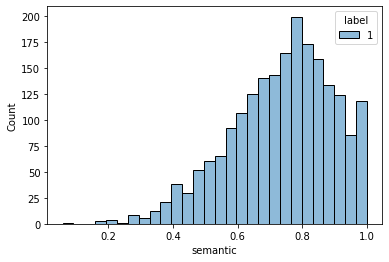

In [ ]:
import seaborn as sns
sns.histplot(data = data_train, x='semantic' , hue='label')

TRAIN DATA SHUFFLED

In [ ]:
data_train_['label'] = 0

In [ ]:
text_train = np.asarray(data_train_['text'])
reason_train = np.asarray(data_train_['reason'])
embeddings1 = model.encode(text_train, convert_to_tensor=True)
embeddings2 = model.encode(reason_train, convert_to_tensor=True)
cosine_scores = util.cos_sim(embeddings1, embeddings2)
simi = []
for i in range(len(text_train)):
  simi.append(cosine_scores[i][i].item())
data_train_['semantic'] = pd.DataFrame(simi)

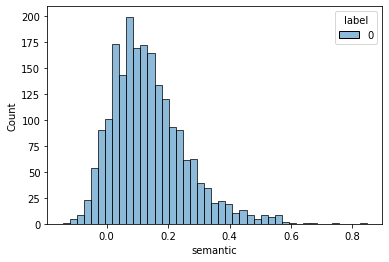

In [ ]:
import seaborn as sns
sns.histplot(data = data_train_, x='semantic' , hue='label')

EVALUATION DATA

In [ ]:
text_train = np.asarray(data_evaluation['text'])
reason_train = np.asarray(data_evaluation['reason'])
embeddings1 = model.encode(text_train, convert_to_tensor=True)
embeddings2 = model.encode(reason_train, convert_to_tensor=True)
cosine_scores = util.cos_sim(embeddings1, embeddings2)
simi = []
for i in range(len(text_train)):
  simi.append(cosine_scores[i][i].item())
data_evaluation['semantic'] = pd.DataFrame(simi)

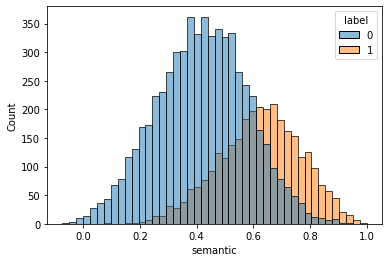

In [ ]:
import seaborn as sns
sns.histplot(data = data_evaluation, x='semantic' , hue='label')

TRYING AGGLOMERATIVE CLUSTERING

In [ ]:
seperators = [ ["[SEP]"] for i in range(len(data_train))]
df_temp = pd.DataFrame(seperators , columns=['sep'])
train_text_ = list(zip(data_train['text'], df_temp['sep'] ,data_train['reason']))

for i in range(len(train_text_)):
  train_text_[i] = " ".join(train_text_[i])
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')
# Our sentences we like to encode
sentences = train_text_
# Sentences are encoded by calling model.encode()
embeddings = model.encode(sentences)

After plotting the semantic scores in accordance with the labels, I observed a noticable relationship between them. Semantic similarity for positive labeled data was comparatively higher in comparison to negative labeled data.
Where the semantic scores was shuffled data was relatively low around 0.1 and for positively labeled original training data, it was around 0.6-1. For evaluation data, the negative labeled data varied around 0.0 to 0.7 concentrating towards 0.4 and positive labeled data 0.2 to 1. Therefore, I realised, I need to generate negative labeled data with similarity around 0.4.

When I shuffled the data, without any knowledge and marked them 0, the semantic score was really low. Therefore, to achieve negative samples with higher semantic similarity, I performed clustering based on semantic scores and shuffled within them.

In [ ]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters = None, affinity="cosine", distance_threshold=0.7, linkage="average" ).fit(embeddings)

In [ ]:
def split_temp(x):
  return x.split('[SEP]')
l = list(map(split_temp , train_text_ ))

In [ ]:
df_back = pd.DataFrame(l, columns=['text', 'reason'])

In [ ]:
df_back['topic'] = pd.DataFrame(clustering.labels_)

In [ ]:
# df_back['label'] = data_train['label']

In [ ]:
# df_back

In [ ]:
# df_back['topic'].unique()

In [ ]:
# df_new.columns=df_back.columns
import random

In [ ]:
df_new = pd.DataFrame(columns=df_back.columns)
for topic in df_back['topic'].unique():
  df_temp = df_back.loc[df_back['topic']==topic].copy()
  df_temp["reason"] = np.random.permutation(df_temp["reason"].values)
  if(len(df_temp) > 1):
    df_new = pd.concat([ df_new , df_temp ], axis = 0)


In [ ]:
from sentence_transformers import SentenceTransformer, util
import seaborn as sns
model = SentenceTransformer('all-MiniLM-L6-v2')
text_train = np.asarray(df_new['text'])
reason_train = np.asarray(df_new['reason'])
embeddings1 = model.encode(text_train, convert_to_tensor=True)
embeddings2 = model.encode(reason_train, convert_to_tensor=True)
cosine_scores = util.cos_sim(embeddings1, embeddings2)
simi = []
for i in range(len(text_train)):
  simi.append(cosine_scores[i][i].item())
df_new['semantic'] = pd.DataFrame(simi)

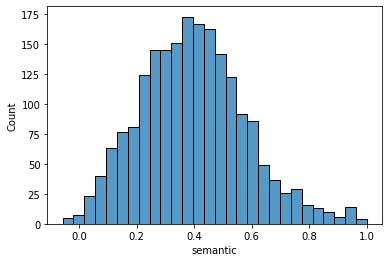

In [ ]:
sns.histplot(data = df_new, x='semantic')

In [ ]:
data_train.isna().sum()

text        0
reason      0
label       0
semantic    0
dtype: int64

In [ ]:
df_new['label'] = 0
data_train_new = pd.concat([data_train, df_new])
# data_train_new.isna().sum()

data_train_new = data_train_new.drop(['topic'], axis=1)
data_train_new = data_train_new.sample(frac = 1)

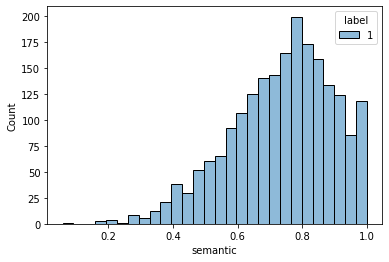

In [ ]:
sns.histplot(data = data_train, x='semantic', hue='label')

In [ ]:
data_train_new = data_train_new.sample(frac = 1).reset_index()

Generated data after grouping data points and generating negative labels

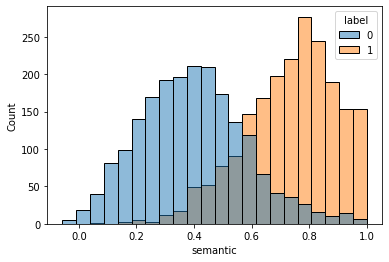

In [ ]:
sns.histplot(data = data_train_new, x='semantic', hue='label')

In [ ]:
data_train_new['label'].value_counts()

1    2061
0    2036
Name: label, dtype: int64

In [ ]:
data_train_new.to_csv('/content/drive/MyDrive/ML-Assignment-Data/enterpret_train_3.csv')
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


DATA HAS BEEN PREPARED

In [ ]:
from google.colab import drive
import numpy as np
import pandas as pd
import tensorflow as tf
import random
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
import IPython

from google.colab import drive
drive.mount('/content/drive')

random.seed(1366)
df = pd.read_csv("/content/drive/MyDrive/ML-Assignment-Data/enterpret_train_3.csv")
device_name = tf.test.gpu_device_name()
df = df.drop_duplicates()

if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

df['label'] = df['label'].astype(int)

import sklearn
from sklearn.model_selection import train_test_split
df_train, df_dev = train_test_split( df, test_size=0.3, random_state=128, shuffle=True, stratify=df['label'])

from transformers import AutoTokenizer
# tokenizer = AutoTokenizer.from_pretrained("cross-encoder/nli-deberta-v3-base")
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")


def tokenize_function(examples):
    return tokenizer(examples["text"], examples["reason"], padding="max_length", truncation=True, max_length = 178)

from datasets import Dataset
train_ds = Dataset.from_pandas(df_train)
dev_ds = Dataset.from_pandas(df_dev)

# display(df_train)
# display(df_dev)

tokenized_train = train_ds.map(tokenize_function, batched=True)
tokenized_dev = dev_ds.map(tokenize_function, batched=True)

tokenized_dev = tokenized_dev.remove_columns(['text', 'reason', 'Unnamed: 0',  'semantic', '__index_level_0__',])
# tokenized_dev = tokenized_dev.with_format("torch")

tokenized_train = tokenized_train.remove_columns(['text', 'reason', 'Unnamed: 0','semantic', '__index_level_0__',])
# tokenized_train = tokenized_train.with_format("torch")

from transformers import AutoModelForSequenceClassification
model = AutoModelForSequenceClassification.from_pretrained("bert-base-cased", num_labels=2)
# model = AutoModelForSequenceClassification.from_pretrained("cross-encoder/nli-deberta-v3-base", num_labels=2, ignore_mismatched_sizes=True)

from transformers import TrainingArguments
training_args = TrainingArguments(output_dir="test_trainer", weight_decay=0.01)
# , weight_decay_pattern=".*", weight_decay_scale=0.01

import evaluate
metric = evaluate.load("f1")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

from transformers import TrainingArguments, Trainer
# training_args = TrainingArguments( evaluation_strategy="epoch", per_device_train_batch_size = 48, per_device_eval_batch_size = 48, num_train_epochs = 5 )
training_args = TrainingArguments(output_dir="test_trainer", evaluation_strategy="epoch", per_device_train_batch_size = 72, per_device_eval_batch_size = 72, num_train_epochs = 5 )

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_dev,
    compute_metrics=compute_metrics,
)

trainer.train()

data_evaluation['label'] = data_evaluation['label'].astype(int)
evaluation_ds = Dataset.from_pandas(data_evaluation)
tokenized_evaluation = evaluation_ds.map(tokenize_function, batched=True)
tokenized_evaluation = tokenized_evaluation.remove_columns(['text', 'reason', 'label'])
tokenized_evaluation = tokenized_evaluation.with_format("torch")
predictions = trainer.predict(tokenized_evaluation)
predictions = np.argmax(predictions.predictions, axis=1)
from sklearn.metrics import classification_report
print(classification_report(data_evaluation['label'], predictions))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found GPU at: /device:GPU:0


  0%|          | 0/3 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

The following columns in the training set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: index. If index are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 2867
  Num Epochs = 5
  Instantaneous batch size per device = 72
  Total train batch size (w. parallel, distributed & accumulation) = 72
  Gradient Accumulation steps = 1
  Total optimization steps = 200
  Number of trainable parameters = 108311810


Epoch,Training Loss,Validation Loss,F1
1,No log,0.346280,0.871146
2,No log,0.365371,0.877419
3,No log,0.389145,0.869427
4,No log,0.424769,0.872841
5,No log,0.440741,0.865036


The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: index. If index are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1230
  Batch size = 72
The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: index. If index are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1230
  Batch size = 72
The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: index. If index are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1230
  Batch size = 72
The fol

  0%|          | 0/9 [00:00<?, ?ba/s]

The following columns in the test set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: semantic. If semantic are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 9000
  Batch size = 72


              precision    recall  f1-score   support

           0       0.86      0.73      0.79      5999
           1       0.58      0.77      0.66      3001

    accuracy                           0.74      9000
   macro avg       0.72      0.75      0.73      9000
weighted avg       0.77      0.74      0.75      9000



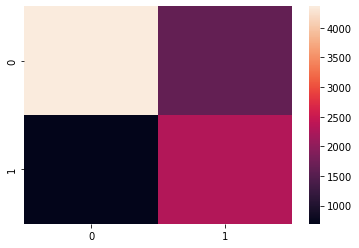

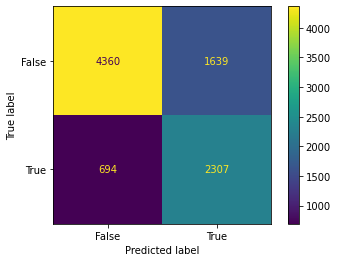

In [ ]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(data_evaluation['label'], predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
# sns.heatmap(confusion_matrix)
cm_display.plot()
# plt.show()

In [ ]:
from google.colab import drive
import numpy as np
import pandas as pd
import tensorflow as tf
import random
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
import IPython

from google.colab import drive
drive.mount('/content/drive')

random.seed(1366)
df = pd.read_csv("/content/drive/MyDrive/ML-Assignment-Data/enterpret_train_3.csv")
device_name = tf.test.gpu_device_name()
df = df.drop_duplicates()

if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

df['label'] = df['label'].astype(int)

import sklearn
from sklearn.model_selection import train_test_split
df_train, df_dev = train_test_split( df, test_size=0.3, random_state=52, shuffle=True, stratify=df['label'])

from transformers import AutoTokenizer
# tokenizer = AutoTokenizer.from_pretrained("cross-encoder/nli-deberta-v3-base")
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")


def tokenize_function(examples):
    return tokenizer(examples["text"], examples["reason"], padding="max_length", truncation=True, max_length = 178)

from datasets import Dataset
train_ds = Dataset.from_pandas(df_train)
dev_ds = Dataset.from_pandas(df_dev)

# display(df_train)
# display(df_dev)

tokenized_train = train_ds.map(tokenize_function, batched=True)
tokenized_dev = dev_ds.map(tokenize_function, batched=True)

tokenized_dev = tokenized_dev.remove_columns(['text', 'reason', 'Unnamed: 0',  'semantic', '__index_level_0__',])
# tokenized_dev = tokenized_dev.with_format("torch")

tokenized_train = tokenized_train.remove_columns(['text', 'reason', 'Unnamed: 0','semantic', '__index_level_0__',])
# tokenized_train = tokenized_train.with_format("torch")

from transformers import AutoModelForSequenceClassification
model = AutoModelForSequenceClassification.from_pretrained("bert-base-cased", num_labels=2)
# model = AutoModelForSequenceClassification.from_pretrained("cross-encoder/nli-deberta-v3-base", num_labels=2, ignore_mismatched_sizes=True)

from transformers import TrainingArguments
training_args = TrainingArguments(output_dir="test_trainer", weight_decay=0.01)
# , weight_decay_pattern=".*", weight_decay_scale=0.01

import evaluate
metric = evaluate.load("f1")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

from transformers import TrainingArguments, Trainer
# training_args = TrainingArguments( evaluation_strategy="epoch", per_device_train_batch_size = 48, per_device_eval_batch_size = 48, num_train_epochs = 5 )
training_args = TrainingArguments(output_dir="test_trainer", evaluation_strategy="epoch", per_device_train_batch_size = 72, per_device_eval_batch_size = 72, num_train_epochs = 2 )

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_dev,
    compute_metrics=compute_metrics,
)

trainer.train()

data_evaluation['label'] = data_evaluation['label'].astype(int)
evaluation_ds = Dataset.from_pandas(data_evaluation)
tokenized_evaluation = evaluation_ds.map(tokenize_function, batched=True)
tokenized_evaluation = tokenized_evaluation.remove_columns(['text', 'reason', 'label'])
tokenized_evaluation = tokenized_evaluation.with_format("torch")
predictions = trainer.predict(tokenized_evaluation)
predictions = np.argmax(predictions.predictions, axis=1)
from sklearn.metrics import classification_report
print(classification_report(data_evaluation['label'], predictions))

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--bert-base-cased/snapshots/5532cc56f74641d4bb33641f5c76a55d11f846e0/config.json
Model config BertConfig {
  "_name_or_path": "bert-base-cased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.26.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 28996
}

loading file vocab.txt from cache at /root/.cache/huggingface/hub/models--bert-base-cased/snapshots/5532cc56f74641d4bb33641f5c76a55d11f846e0/vocab.txt
loading file tokenize

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found GPU at: /device:GPU:0


  0%|          | 0/3 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--bert-base-cased/snapshots/5532cc56f74641d4bb33641f5c76a55d11f846e0/config.json
Model config BertConfig {
  "_name_or_path": "bert-base-cased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.26.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 28996
}

loading weights file pytorch_model.bin from cache at /root/.cache/huggingface/hub/models--bert-base-cased/snapshots/5532cc56f74641d4bb33641f5c76a55d11f846e0/pytorch_model.b

Epoch,Training Loss,Validation Loss,F1
1,No log,0.352640,0.864062
2,No log,0.369858,0.863563


The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: index. If index are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1230
  Batch size = 72
The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: index. If index are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1230
  Batch size = 72


Training completed. Do not forget to share your model on huggingface.co/models =)




  0%|          | 0/9 [00:00<?, ?ba/s]

***** Running Prediction *****
  Num examples = 9000
  Batch size = 72


              precision    recall  f1-score   support

           0       0.82      0.80      0.81      5999
           1       0.62      0.66      0.64      3001

    accuracy                           0.75      9000
   macro avg       0.72      0.73      0.72      9000
weighted avg       0.76      0.75      0.75      9000



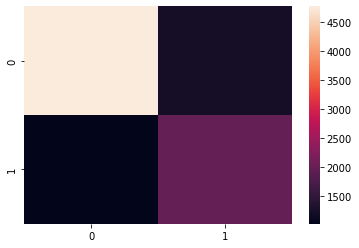

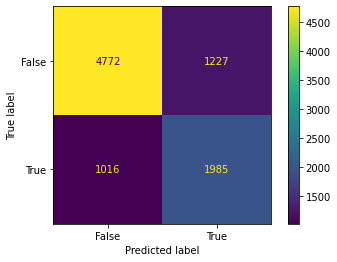

In [ ]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(data_evaluation['label'], predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
sns.heatmap(confusion_matrix)
cm_display.plot()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
results = []
accuracy = accuracy_score(data_evaluation['label'], predictions)
results.append((model, accuracy))

# Create the ablation study table
ablation_study = pd.DataFrame(columns=['Model', 'Accuracy'])
for i, result in enumerate(results):
    model, accuracy = result
    ablation_study.loc[i] = [model, accuracy]

# Print the ablation study table
print(ablation_study)

                                               Model  Accuracy
0  BertForSequenceClassification(\n  (bert): Bert...  0.750778


In [ ]:
from google.colab import drive
import numpy as np
import pandas as pd
import tensorflow as tf
import random
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
import IPython

from google.colab import drive
drive.mount('/content/drive')

random.seed(1366)
df = pd.read_csv("/content/drive/MyDrive/ML-Assignment-Data/enterpret_train_3.csv")
device_name = tf.test.gpu_device_name()
df = df.drop_duplicates()

if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

df['label'] = df['label'].astype(int)

import sklearn
from sklearn.model_selection import train_test_split
df_train, df_dev = train_test_split( df, test_size=0.2, random_state=42, shuffle=True, stratify=df['label'])

from transformers import AutoTokenizer
# tokenizer = AutoTokenizer.from_pretrained("cross-encoder/nli-deberta-v3-base")
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")


def tokenize_function(examples):
    return tokenizer(examples["text"], examples["reason"], padding="max_length", truncation=True, max_length = 156)

from datasets import Dataset
train_ds = Dataset.from_pandas(df_train)
dev_ds = Dataset.from_pandas(df_dev)

# display(df_train)
# display(df_dev)

tokenized_train = train_ds.map(tokenize_function, batched=True)
tokenized_dev = dev_ds.map(tokenize_function, batched=True)

tokenized_dev = tokenized_dev.remove_columns(['text', 'reason', 'Unnamed: 0', "__index_level_0__"])
# tokenized_dev = tokenized_dev.with_format("torch")

tokenized_train = tokenized_train.remove_columns(['text', 'reason', 'Unnamed: 0', "__index_level_0__"])
# tokenized_train = tokenized_train.with_format("torch")

from transformers import AutoModelForSequenceClassification
model = AutoModelForSequenceClassification.from_pretrained("bert-base-cased", num_labels=2)
# model = AutoModelForSequenceClassification.from_pretrained("cross-encoder/nli-deberta-v3-base", num_labels=2, ignore_mismatched_sizes=True)

from transformers import TrainingArguments
training_args = TrainingArguments(output_dir="test_trainer", learning_rate = 0.00001)

import evaluate
metric = evaluate.load("f1")

def compute_metrics(eval_pred):
  logits, labels = eval_pred
  predictions = np.argmax(logits, axis=-1)
  return metric.compute(predictions=predictions, references=labels)

from transformers import TrainingArguments, Trainer
# training_args = TrainingArguments( evaluation_strategy="epoch", per_device_train_batch_size = 48, per_device_eval_batch_size = 48, num_train_epochs = 5 )
training_args = TrainingArguments(output_dir="test_trainer", evaluation_strategy="epoch", per_device_train_batch_size = 72, per_device_eval_batch_size = 72, num_train_epochs = 4 )

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_dev,
    compute_metrics=compute_metrics,
)

trainer.train()

data_evaluation['label'] = data_evaluation['label'].astype(int)
evaluation_ds = Dataset.from_pandas(data_evaluation)
tokenized_evaluation = evaluation_ds.map(tokenize_function, batched=True)
tokenized_evaluation = tokenized_evaluation.remove_columns(['text', 'reason', 'label'])
tokenized_evaluation = tokenized_evaluation.with_format("torch")
predictions = trainer.predict(tokenized_evaluation)
predictions = np.argmax(predictions.predictions, axis=1)
from sklearn.metrics import classification_report
print(classification_report(data_evaluation['label'], predictions))

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--bert-base-cased/snapshots/5532cc56f74641d4bb33641f5c76a55d11f846e0/config.json
Model config BertConfig {
  "_name_or_path": "bert-base-cased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.26.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 28996
}

loading file vocab.txt from cache at /root/.cache/huggingface/hub/models--bert-base-cased/snapshots/5532cc56f74641d4bb33641f5c76a55d11f846e0/vocab.txt
loading file tokenize

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found GPU at: /device:GPU:0


  0%|          | 0/4 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--bert-base-cased/snapshots/5532cc56f74641d4bb33641f5c76a55d11f846e0/config.json
Model config BertConfig {
  "_name_or_path": "bert-base-cased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.26.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 28996
}

loading weights file pytorch_model.bin from cache at /root/.cache/huggingface/hub/models--bert-base-cased/snapshots/5532cc56f74641d4bb33641f5c76a55d11f846e0/pytorch_model.b

Epoch,Training Loss,Validation Loss,F1
1,No log,0.357784,0.878587
2,No log,0.306423,0.894860
3,No log,0.366884,0.876190
4,No log,0.390485,0.877480


The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: semantic, index. If semantic, index are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 820
  Batch size = 72
The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: semantic, index. If semantic, index are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 820
  Batch size = 72
The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: semantic, index. If semantic, index are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evalua

  0%|          | 0/9 [00:00<?, ?ba/s]

The following columns in the test set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: semantic. If semantic are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 9000
  Batch size = 72


              precision    recall  f1-score   support

           0       0.87      0.72      0.79      5999
           1       0.58      0.78      0.67      3001

    accuracy                           0.74      9000
   macro avg       0.72      0.75      0.73      9000
weighted avg       0.77      0.74      0.75      9000



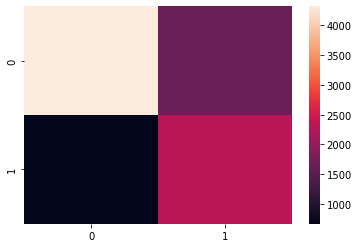

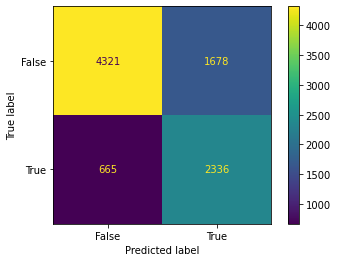

In [ ]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(data_evaluation['label'], predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
from google.colab import drive
import numpy as np
import pandas as pd
import tensorflow as tf
import random
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
import IPython

from google.colab import drive
drive.mount('/content/drive')

random.seed(1366)
df = pd.read_csv("/content/drive/MyDrive/ML-Assignment-Data/enterpret_train_3.csv")
device_name = tf.test.gpu_device_name()
df = df.drop_duplicates()

if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

df['label'] = df['label'].astype(int)

import sklearn
from sklearn.model_selection import train_test_split
df_train, df_dev = train_test_split( df, test_size=0.2, random_state=42, shuffle=True, stratify=df['label'])

from transformers import AutoTokenizer
# tokenizer = AutoTokenizer.from_pretrained("cross-encoder/nli-deberta-v3-base")
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")


def tokenize_function(examples):
    return tokenizer(examples["text"], examples["reason"], padding="max_length", truncation=True, max_length = 156)

from datasets import Dataset
train_ds = Dataset.from_pandas(df_train)
dev_ds = Dataset.from_pandas(df_dev)

# display(df_train)
# display(df_dev)

tokenized_train = train_ds.map(tokenize_function, batched=True)
tokenized_dev = dev_ds.map(tokenize_function, batched=True)

tokenized_dev = tokenized_dev.remove_columns(['text', 'reason', 'Unnamed: 0', "__index_level_0__"])
# tokenized_dev = tokenized_dev.with_format("torch")

tokenized_train = tokenized_train.remove_columns(['text', 'reason', 'Unnamed: 0', "__index_level_0__"])
# tokenized_train = tokenized_train.with_format("torch")

from transformers import AutoModelForSequenceClassification
model = AutoModelForSequenceClassification.from_pretrained("bert-base-cased", num_labels=2)
# model = AutoModelForSequenceClassification.from_pretrained("cross-encoder/nli-deberta-v3-base", num_labels=2, ignore_mismatched_sizes=True)

from transformers import TrainingArguments
training_args = TrainingArguments(output_dir="test_trainer", learning_rate = 0.00001)

import evaluate
metric = evaluate.load("f1")

def compute_metrics(eval_pred):
  logits, labels = eval_pred
  predictions = np.argmax(logits, axis=-1)
  return metric.compute(predictions=predictions, references=labels)

from transformers import TrainingArguments, Trainer
# training_args = TrainingArguments( evaluation_strategy="epoch", per_device_train_batch_size = 48, per_device_eval_batch_size = 48, num_train_epochs = 5 )
training_args = TrainingArguments(output_dir="test_trainer", evaluation_strategy="epoch", per_device_train_batch_size = 72, per_device_eval_batch_size = 72, num_train_epochs = 4 )

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_dev,
    compute_metrics=compute_metrics,
)

trainer.train()

data_evaluation['label'] = data_evaluation['label'].astype(int)
evaluation_ds = Dataset.from_pandas(data_evaluation)
tokenized_evaluation = evaluation_ds.map(tokenize_function, batched=True)
tokenized_evaluation = tokenized_evaluation.remove_columns(['text', 'reason', 'label'])
tokenized_evaluation = tokenized_evaluation.with_format("torch")
predictions = trainer.predict(tokenized_evaluation)
predictions = np.argmax(predictions.predictions, axis=1)
from sklearn.metrics import classification_report
print(classification_report(data_evaluation['label'], predictions))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found GPU at: /device:GPU:0


loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--bert-base-cased/snapshots/5532cc56f74641d4bb33641f5c76a55d11f846e0/config.json
Model config BertConfig {
  "_name_or_path": "bert-base-cased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.26.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 28996
}

loading file vocab.txt from cache at /root/.cache/huggingface/hub/models--bert-base-cased/snapshots/5532cc56f74641d4bb33641f5c76a55d11f846e0/vocab.txt
loading file tokenize

  0%|          | 0/4 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--bert-base-cased/snapshots/5532cc56f74641d4bb33641f5c76a55d11f846e0/config.json
Model config BertConfig {
  "_name_or_path": "bert-base-cased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.26.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 28996
}

loading weights file pytorch_model.bin from cache at /root/.cache/huggingface/hub/models--bert-base-cased/snapshots/5532cc56f74641d4bb33641f5c76a55d11f846e0/pytorch_model.b

Epoch,Training Loss,Validation Loss,F1
1,No log,0.322881,0.889671
2,No log,0.352664,0.877480


The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: index, semantic. If index, semantic are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 820
  Batch size = 72
The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: index, semantic. If index, semantic are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 820
  Batch size = 72


Epoch,Training Loss,Validation Loss,F1
1,No log,0.322881,0.889671
2,No log,0.352664,0.877480
3,No log,0.412982,0.868949
4,No log,0.439970,0.869461


The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: index, semantic. If index, semantic are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 820
  Batch size = 72
The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: index, semantic. If index, semantic are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 820
  Batch size = 72


Training completed. Do not forget to share your model on huggingface.co/models =)




  0%|          | 0/9 [00:00<?, ?ba/s]

The following columns in the test set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: semantic. If semantic are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 9000
  Batch size = 72


              precision    recall  f1-score   support

           0       0.87      0.75      0.81      5999
           1       0.61      0.79      0.69      3001

    accuracy                           0.76      9000
   macro avg       0.74      0.77      0.75      9000
weighted avg       0.79      0.76      0.77      9000



In [ ]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(data_evaluation['label'], predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
# text_reason = list(zip(data_train_['text'], data_train_['reason']))
# text_reason1 = list(zip(data_train_1['text'], data_train_1['reason']))
# text_reason2 = list(zip(data_train_2['text'], data_train_2['reason']))
# text_reason3 = list(zip(data_train_3['text'], data_train_3['reason']))

In [ ]:
# text_reason[0]

In [ ]:
# from sentence_transformers import CrossEncoder
# model = CrossEncoder('cross-encoder/nli-deberta-v3-base', device ="cuda")
# scores = model.predict(text_reason, batch_size=16)

# #Convert scores to labels
# # label_mapping = ['contradiction', 'entailment', 'neutral']
# data_train_["label"] = [score_max for score_max in scores.argmax(axis=1)]

In [ ]:
# # from sentence_transformers import CrossEncoder
# # model = CrossEncoder('cross-encoder/nli-deberta-v3-base', device ="cuda")
# scores = model.predict(text_reason1, batch_size=16)

# #Convert scores to labels
# # label_mapping = ['contradiction', 'entailment', 'neutral']
# data_train_1["label"] = [score_max for score_max in scores.argmax(axis=1)]

In [ ]:
# # from sentence_transformers import CrossEncoder
# # model = CrossEncoder('cross-encoder/nli-deberta-v3-base', device ="cuda")
# scores = model.predict(text_reason2, batch_size=16)

# #Convert scores to labels
# # label_mapping = ['contradiction', 'entailment', 'neutral']
# data_train_2["label"] = [score_max for score_max in scores.argmax(axis=1)]

In [ ]:
# # from sentence_transformers import CrossEncoder
# # model = CrossEncoder('cross-encoder/nli-deberta-v3-base', device ="cuda")
# scores = model.predict(text_reason3, batch_size=16)

# #Convert scores to labels
# # label_mapping = ['contradiction', 'entailment', 'neutral']
# data_train_3["label"] = [score_max for score_max in scores.argmax(axis=1)]

In [ ]:
# data_train_.drop(columns=['label'], axis=0, inplace=True)

In [ ]:
# data_train_.groupby('label').count()

In [ ]:
data_evaluation['label'].value_counts()

In [ ]:
# text_reason = list(zip(data_evaluation['text'], data_evaluation['reason']))

In [ ]:
# from sentence_transformers import CrossEncoder
# model = CrossEncoder('cross-encoder/nli-deberta-v3-base', device ="cuda")
# scores = model.predict(text_reason, batch_size=16)

# #Convert scores to labels
# # label_mapping = ['contradiction', 'entailment', 'neutral']
# data_evaluation["new_label"] = [score_max for score_max in scores.argmax(axis=1)]

In [ ]:
# data_evaluation.loc[data_evaluation['new_label'] == 2].groupby('label').count()

In [ ]:
# data_evaluation['new_label'].value_counts()

In [ ]:
# data_evaluation['new_label'] = data_evaluation['new_label'].map({ 0:0 , 1:1 , 2:0 })

In [ ]:
# data_evaluation['label'].value_counts()

In [ ]:
# data_evaluation['new_label'].value_counts()

In [ ]:
# from sklearn.metrics import classification_report
# print(classification_report(data_evaluation['label'], data_evaluation['new_label']))

In [ ]:
# data_train['reason_length'].plot(kind='hist')

In [ ]:
# df_final = pd.concat([data_train, data_train_, data_train_1, data_train_2, data_train_3 ])

In [ ]:
# df_final['label'].value_counts()

In [ ]:
# df_final['label'] = df_final['label'].map({0:0, 1:1, 2:0})

In [ ]:
# df_final['label'].value_counts()

In [ ]:
# df_final.to_csv("/content/drive/MyDrive/ML-Assignment-Data/enterpret_train.csv")
# df.to_csv("/content/drive/MyDrive/ML-Assignment-Data/enterpret_train_2.csv")
# df.to_csv("/content/drive/MyDrive/ML-Assignment-Data/enterpret_train_3.csv")

TRYING SEMANTIC ANALYSIS

In [ ]:
!pip uninstall gdown -y && pip install gdown
!gdown -V
!gdown --folder https://drive.google.com/drive/folders/1uJuupX93EWaQ4xlGuDK7PGf-4k2uDUeF?usp=sharing

In [ ]:
from google.colab import drive
import numpy as np
import pandas as pd
import tensorflow as tf
import random
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
import IPython
random.seed(1366)


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
# data_evaluation = pd.read_excel("/content/drive/MyDrive/ML-Assignment-Data/evaluation.xlsx")
# data_train = pd.read_excel("/content/drive/MyDrive/ML-Assignment-Data/train.xlsx")

In [ ]:
# df = pd.read_csv("/content/drive/MyDrive/ML-Assignment-Data/enterpret_train.csv")
# df = pd.read_csv("/content/drive/MyDrive/ML-Assignment-Data/enterpret_train_2.csv")
df = pd.read_csv("/content/drive/MyDrive/ML-Assignment-Data/enterpret_train_3.csv")
# df = data_evaluation

In [ ]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')

print('Found GPU at: {}'.format(device_name))

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
df_train, df_dev = train_test_split( df, test_size=0.2, random_state=42, shuffle=True, stratify=df['label'])

In [ ]:
df_train.head()

In [ ]:
!pip install transformers
!pip install datasets
!pip install sentencepiece

In [ ]:
!pip install datasets

In [ ]:
!pip install sentencepiece

In [ ]:
from transformers import AutoTokenizer

In [ ]:
df.isna().sum()

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")
# tokenizer = AutoTokenizer.from_pretrained("cross-encoder/nli-deberta-v3-base")

In [ ]:
def tokenize_function(examples):
    return tokenizer(examples["text"], examples["reason"], padding="max_length", truncation=True, max_length = 128)

In [ ]:
from datasets import Dataset

In [ ]:
train_ds = Dataset.from_pandas(df_train)
dev_ds = Dataset.from_pandas(df_dev)

In [ ]:
tokenized_train = train_ds.map(tokenize_function, batched=True)
tokenized_dev = dev_ds.map(tokenize_function, batched=True)

tokenized_dev = tokenized_dev.remove_columns(['text', 'reason',  'Unnamed: 0'])
tokenized_dev = tokenized_dev.with_format("torch")

tokenized_train = tokenized_train.remove_columns(['text', 'reason', 'Unnamed: 0'])
tokenized_train = tokenized_train.with_format("torch")

In [ ]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained("bert-base-cased")
# model = AutoModelForSequenceClassification.from_pretrained("cross-encoder/nli-deberta-v3-base", num_labels=2, ignore_mismatched_sizes=True)

In [ ]:
from transformers import TrainingArguments
training_args = TrainingArguments(output_dir="test_trainer")

In [ ]:
!pip install evaluate

In [ ]:
import numpy as np
import evaluate
metric = evaluate.load("f1")

In [ ]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

In [ ]:
from transformers import TrainingArguments, Trainer
training_args = TrainingArguments(output_dir="test_trainer", evaluation_strategy="epoch", per_device_train_batch_size = 48, per_device_eval_batch_size = 48, num_train_epochs = 5 )

In [ ]:
# import torch
# torch.cuda.empty_cache()

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_dev,
    compute_metrics=compute_metrics,
)

In [ ]:
trainer.train()

In [ ]:
evaluation_ds = Dataset.from_pandas(data_evaluation)
tokenized_evaluation = evaluation_ds.map(tokenize_function, batched=True)


In [ ]:
tokenized_evaluation = tokenized_evaluation.remove_columns(['text', 'reason', 'label'])

In [ ]:
# tokenized_evaluation = tokenized_evaluation.remove_columns(['text', 'reason', 'label'])
tokenized_evaluation = tokenized_evaluation.with_format("torch")

In [ ]:
predictions = trainer.predict(tokenized_evaluation)

***** Running Prediction *****
  Num examples = 9000
  Batch size = 48


OutOfMemoryError: ignored

In [ ]:
predictions

PredictionOutput(predictions=array([[-1.3684585,  1.5168414],
       [ 3.7300107, -3.7750192],
       [-1.1508856,  1.3512421],
       ...,
       [-0.856782 ,  1.0527728],
       [ 3.7948203, -4.15189  ],
       [ 1.9365667, -1.5470876]], dtype=float32), label_ids=None, metrics={'test_runtime': 77.2477, 'test_samples_per_second': 116.508, 'test_steps_per_second': 2.434})

In [ ]:
predictions = np.argmax(predictions.predictions, axis=1)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(data_evaluation['label'], predictions))

              precision    recall  f1-score   support

         0.0       0.96      0.76      0.85      5999
         1.0       0.66      0.94      0.77      3001

    accuracy                           0.82      9000
   macro avg       0.81      0.85      0.81      9000
weighted avg       0.86      0.82      0.82      9000



In [ ]:
data_train[data_train['reason']]

KeyError: ignored

In [ ]:
data_evaluation

,text,reason,label
0,the app is crashing when i play a vedio,app crashes during playback,1.0
1,but i want to connect it to the tv from one de...,want compatibility with more smart televisions,0.0
2,very helpful when and home working remotley,good app for work,0.0
3,this zoom so called and missed call and mobile...,receiving incorrect phone number message,0.0
4,one of my favorite apps,good for spending time,0.0
...,...,...,...
8995,very good streaming platform has a lot of content,app has very good content,1.0
8996,so paying for an app that is not fit for purpose.,unable to use app,0.0
8997,"it does not work well for me, it loads, but if...",app keeps loading indefinitely,0.0
8998,i can not watch the new disney shows.,unable to load the episodes list,0.0


In [ ]:
" ".join(data_train['reason'])

'good app for conducting online classes app is user-friendly good for video conferencing unable to download zoom app want to download the app app is not working good app for conducting online meeting unable to switch virtual background video quality is poor want to login want to update zoom app unable to install good app for conducting online classes and meetings want to connect to meetings sound stopped working google meet is better receiving incorrect password message want to sign up poor quality of the application want to add profile picture unable to login want to install good app for students facing network issues with app want to connect to classes want to connect to zoom audio quality is bad want ukrainian language support want to connect to audio device want to start application want to use microphone want to put background on android phone skype is better good app for cloud meetings facing network connection issues unable to attend zoom meetings unable to download the app unab

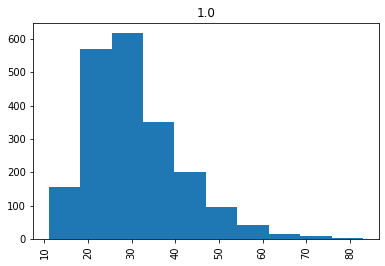

In [ ]:
data_train.hist(column='reason_length', by="label")

In [ ]:
data_evaluation.hist(column='reason_length', by="label")

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, criterion = 'entropy', n_estimators=1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)


In [ ]:
from google.colab import drive
import numpy as np
import pandas as pd
import tensorflow as tf
import random
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
import IPython
random.seed(1366)

BERTOPIC

In [ ]:
!pip install bertopic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.9/103.9 KB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 52.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 12.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 662.4/662.4 KB 57.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 12.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 98.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 38.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install bertopic[flair]
!pip install bertopic[gensim]
!pip install bertopic[spacy]
!pip install bertopic[use]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.9/401.9 KB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 KB 47.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 788.5/788.5 KB 51.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 37.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 KB 1.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 43.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from bertopic import BERTopic
from sklearn.datasets import fetch_20newsgroups

# docs = fetch_20newsgroups(subset='all',  remove=('headers', 'footers', 'quotes'))['data']
# print(docs)
# topic_model = BERTopic()
# topics, probs = topic_model.fit_transform(docs)

In [ ]:
# docs

In [ ]:
seperators = [ ["[SEP]"] for i in range(len(data_train))]
# seperators =  pd.Series(np.array(seperators))
# df_temp = df_temp.assign("sep"=seperators)

In [ ]:
df_temp = pd.DataFrame(seperators , columns=['sep'])

In [ ]:
df_temp

,sep
0,[SEP]
1,[SEP]
2,[SEP]
3,[SEP]
4,[SEP]
...,...
2056,[SEP]
2057,[SEP]
2058,[SEP]
2059,[SEP]


In [ ]:
train_text_ = list(zip(data_train['text'], df_temp['sep'] ,data_train['reason']))


In [ ]:
train_text_labels = data_train['label']

In [ ]:
train_text_[1]

('very practical and easy to use', '[SEP]', 'app is user-friendly')

In [ ]:
for i in range(len(train_text_)):
  train_text_[i]  = " ".join(train_text_[i])

In [ ]:
train_text_[0]

NameError: ignored

In [ ]:
topic_model = BERTopic()
topics, probs = topic_model.fit_transform(train_text_)


In [ ]:
topic_model = BERTopic()
topics, probs = topic_model.fit_transform(train_text_)
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

#Our sentences we like to encode
sentences = train_text_

#Sentences are encoded by calling model.encode()
embeddings = model.encode(sentences)

NameError: ignored

In [ ]:
topic_model.get_topic_info()

,Topic,Count,Name
0,-1,558,-1_the_to_sep_is
1,0,159,0_zoom_my_cloud_not
2,1,142,1_for_good_online_very
3,2,75,2_interface_version_is_app
4,3,64,3_meeting_meetings_join_conference
5,4,52,4_sign_account_login_register
6,5,50,5_slow_takes_data_time
7,6,48,6_quality_video_image_good
8,7,48,7_crashes_freezes_app_keeps
9,8,47,8_background_wallpaper_backgrounds_change


In [ ]:
topic_model.get_topic(0)

[('zoom', 0.09782932243488951),
 ('my', 0.020911040271835477),
 ('cloud', 0.018601337086889005),
 ('not', 0.016945116675934773),
 ('in', 0.01671177972009858),
 ('to', 0.016635908071280917),
 ('is', 0.015866194562310955),
 ('want', 0.015478392348560582),
 ('meeting', 0.015323265750512792),
 ('can', 0.015148203335102679)]

In [ ]:
topic_model.get_document_info(train_text_)

,Document,Topic,Name,Top_n_words,Probability,Representative_document
0,this is an amazing app for online classes!but ...,1,1_for_good_online_very,for - good - online - very - meetings - classe...,0.940749,False
1,very practical and easy to use [SEP] app is us...,2,2_interface_version_is_app,interface - version - is - app - user - bad - ...,1.000000,False
2,this app is very good for video conferencing. ...,1,1_for_good_online_very,for - good - online - very - meetings - classe...,1.000000,False
3,i can not download this zoom app [SEP] unable ...,0,0_zoom_my_cloud_not,zoom - my - cloud - not - in - to - is - want ...,1.000000,False
4,i am not able to download this app [SEP] want ...,17,17_download_install_app_not,download - install - app - not - installed - s...,1.000000,False
...,...,...,...,...,...,...
2056,i am not getting jio tv properly. [SEP] unable...,16,16_tv_on_smart_unable,tv - on - smart - unable - android - install -...,0.728115,False
2057,(learn from the netflix interface) [SEP] netfl...,27,27_disney_netflix_content_than,disney - netflix - content - than - plus - bet...,0.485878,False
2058,"hello,\ndisney+ must also be installed on chro...",27,27_disney_netflix_content_than,disney - netflix - content - than - plus - bet...,0.464710,False
2059,it is a shame that disney+ does not work on tv...,27,27_disney_netflix_content_than,disney - netflix - content - than - plus - bet...,0.987996,False


In [ ]:
from google.colab import drive
import numpy as np
import pandas as pd
import tensorflow as tf
import random
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
import IPython

from google.colab import drive
drive.mount('/content/drive')
random.seed(1366)
df = pd.read_csv("/content/drive/MyDrive/ML-Assignment-Data/enterpret_train_3.csv")
device_name = tf.test.gpu_device_name()
df = df.drop_duplicates()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))
df['label'] = df['label'].astype(int)

import sklearn
from sklearn.model_selection import train_test_split
df_train, df_dev = train_test_split( df, test_size=0.3, random_state=52, shuffle=True, stratify=df['label'])

from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")


def tokenize_function(examples):
    return tokenizer(examples["text"], examples["reason"], padding="max_length", truncation=True, max_length = 178)

from datasets import Dataset
train_ds = Dataset.from_pandas(df_train)
dev_ds = Dataset.from_pandas(df_dev)
tokenized_train = train_ds.map(tokenize_function, batched=True)
tokenized_dev = dev_ds.map(tokenize_function, batched=True)

tokenized_dev = tokenized_dev.remove_columns(['text', 'reason', 'Unnamed: 0',  'semantic', '__index_level_0__',])

tokenized_train = tokenized_train.remove_columns(['text', 'reason', 'Unnamed: 0','semantic', '__index_level_0__',])

from transformers import AutoModelForSequenceClassification
model = AutoModelForSequenceClassification.from_pretrained("bert-base-cased", num_labels=2)

from transformers import TrainingArguments
training_args = TrainingArguments(output_dir="test_trainer", weight_decay=0.01)

import evaluate
metric = evaluate.load("f1")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

from transformers import TrainingArguments, Trainer
# training_args = TrainingArguments( evaluation_strategy="epoch", per_device_train_batch_size = 48, per_device_eval_batch_size = 48, num_train_epochs = 5 )
training_args = TrainingArguments(output_dir="test_trainer", evaluation_strategy="epoch", per_device_train_batch_size = 72, per_device_eval_batch_size = 72, num_train_epochs = 2 )

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_dev,
    compute_metrics=compute_metrics,
)

trainer.train()

data_evaluation['label'] = data_evaluation['label'].astype(int)
evaluation_ds = Dataset.from_pandas(data_evaluation)
tokenized_evaluation = evaluation_ds.map(tokenize_function, batched=True)
tokenized_evaluation = tokenized_evaluation.remove_columns(['text', 'reason', 'label'])
tokenized_evaluation = tokenized_evaluation.with_format("torch")
predictions = trainer.predict(tokenized_evaluation)
predictions = np.argmax(predictions.predictions, axis=1)
from sklearn.metrics import classification_report
print(classification_report(data_evaluation['label'], predictions))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found GPU at: /device:GPU:0


  0%|          | 0/3 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

Epoch,Training Loss,Validation Loss,F1
1,No log,0.341628,0.875867
2,No log,0.340649,0.872357


The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: index. If index are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1230
  Batch size = 72
The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: index. If index are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1230
  Batch size = 72


Training completed. Do not forget to share your model on huggingface.co/models =)




  0%|          | 0/9 [00:00<?, ?ba/s]

***** Running Prediction *****
  Num examples = 9000
  Batch size = 72


              precision    recall  f1-score   support

           0       0.83      0.75      0.79      5999
           1       0.59      0.70      0.64      3001

    accuracy                           0.73      9000
   macro avg       0.71      0.73      0.71      9000
weighted avg       0.75      0.73      0.74      9000



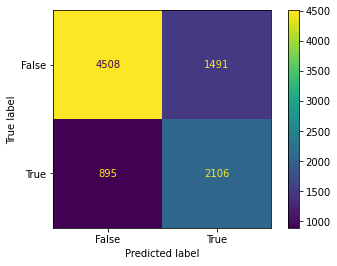

In [ ]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(data_evaluation['label'], predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
# sns.heatmap(confusion_matrix)
cm_display.plot()
plt.show()